# ЛАБОРАТОРНАЯ РАБОТА №1

# Выполнили: Рогозян Анастасия и Дробот Елизавета

## 1 Задание. 
## Собрать данные по дневным ценам активов (акций) и дневным объемам продаж на заданном фондовом рынке за указанный период. Добавить (если нет) данные по индексу рынка.

Сначала мы загружаем нужные нам библиотека для работы с сайтом YahooFinancials. Подключаем библиотеки через import.

In [1]:
pip install YahooFinancials

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pathlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install ruamel-yaml

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import yfinance as yf
import numpy as np
from yahoofinancials import YahooFinancials
import datetime
import matplotlib.pyplot as plt
import copy
import math
import scipy
import scipy.stats
start = datetime.datetime(2017,1,1)
end = datetime.datetime(2017,12,31)

Загружаем файл, в который заранее скачали информацию обо всех акциях биржи Индийского фонда.

In [6]:
companies = pd.read_csv("resalt.csv")
companies

,Название,Тикер,Биржа,Cектор,Изм.%
0,3P Land,3PLA,NSE,Недвижимость,"-0,88"
1,3rd Rock Multimedia Ltd,3RDR,NSE,Услуги связи,0
2,63 Moons Tech,63MO,NSE,Информационные технологии,"4,14"
3,A2z Infra Engineering,A2ZI,NSE,Промышленность,"-3,96"
4,AAA Technologies,AAAH,NSE,Информационные технологии,"1,47"
...,...,...,...,...,...
2061,Zota Health Care,ZOTA,NSE,Здравоохранение,"-1,75"
2062,Zuari Agro Chemicals Ltd,ZUAR,NSE,Материалы,"2,03"
2063,Zuari Industries,ZURI,NSE,Производители товаров массового потребления,"0,3"
2064,Zydus Wellness,ZYDS,NSE,Производители товаров массового потребления,"-0,96"


Из файла выше нам понадобятся тикеры компаний.

In [7]:
Symbols = companies['Тикер'].tolist()
Symbols.sort()
Symbols

['3PLA',
 '3RDR',
 '63MO',
 'A2ZI',
 'AAAH',
 'AAAI',
 'AADM',
 'AAKA',
 'AARI',
 'AARN',
 'AARU',
 'ABAN',
 'ABB',
 'ABCO',
 'ABDL',
 'ABHE',
 'ABIN',
 'ABML',
 'ABMN',
 'ABMT',
 'ABOT',
 'ABUJ',
 'ACC',
 'ACCO',
 'ACCU',
 'ACCY',
 'ACEL',
 'ACEN',
 'ACLL',
 'ACPL',
 'ACRI',
 'ADAG',
 'ADAI',
 'ADAN',
 'ADAW',
 'ADEL',
 'ADEN',
 'ADHO',
 'ADIA',
 'ADIE',
 'ADIS',
 'ADNA',
 'ADOR',
 'ADPH',
 'ADRG',
 'ADTB',
 'AEGS',
 'AETH',
 'AFFL',
 'AGIG',
 'AGRO',
 'AGRP',
 'AGST',
 'AGTL',
 'AGWL',
 'AHFN',
 'AHIN',
 'AHLA',
 'AHLU',
 'AIAE',
 'AIRA',
 'AIRO',
 'AISG',
 'AJAN',
 'AJME',
 'AJOO',
 'AJPH',
 'AJRI',
 'AKAS',
 'AKGE',
 'AKSH',
 'AKSO',
 'AKZO',
 'ALAK',
 'ALBD',
 'ALCL',
 'ALEM',
 'ALIO',
 'ALKE',
 'ALKY',
 'ALLS',
 'ALMC',
 'ALML',
 'ALOK',
 'ALPA',
 'ALPI',
 'ALPS',
 'ALSL',
 'AMAR',
 'AMBE',
 'AMBK',
 'AMBN',
 'AMDM',
 'AMIO',
 'AMJL',
 'AMJU',
 'AMPL',
 'AMRN',
 'AMSP',
 'ANAA',
 'ANCM',
 'ANDA',
 'ANDC',
 'ANDS',
 'ANDY',
 'ANGO',
 'ANII',
 'ANIK',
 'ANMI',
 'ANRA',
 'ANSL',
 'A

In [8]:
# Создаем пустой DataFrame
stock_final = pd.DataFrame()
# перебираем каждый символ
for i in Symbols:  
    
    # печатаем символ, который загружается
    print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
    
    try:
        # скачиваем ценеу акции
        stock = []
        stock = yf.download(i,start=start, end=end, progress=False)
        
        # добавляем цены отдельных акций
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None


0 : 3PLA,
1 Failed download:
- 3PLA: No data found for this date range, symbol may be delisted
1 : 3RDR,
1 Failed download:
- 3RDR: No data found for this date range, symbol may be delisted
2 : 63MO,
1 Failed download:
- 63MO: No data found for this date range, symbol may be delisted
3 : A2ZI,
1 Failed download:
- A2ZI: No data found for this date range, symbol may be delisted
4 : AAAH,
1 Failed download:
- AAAH: No data found for this date range, symbol may be delisted
5 : AAAI,
1 Failed download:
- AAAI: No data found for this date range, symbol may be delisted
6 : AADM,
1 Failed download:
- AADM: No data found for this date range, symbol may be delisted
7 : AAKA,
1 Failed download:
- AAKA: No data found for this date range, symbol may be delisted
8 : AARI,
1 Failed download:
- AARI: No data found for this date range, symbol may be delisted
9 : AARN,
1 Failed download:
- AARN: No data found for this date range, symbol may be delisted
10 : AARU,
1 Failed download:
- AARU: No data foun

99 : ANAA,
1 Failed download:
- ANAA: No data found for this date range, symbol may be delisted
100 : ANCM,
1 Failed download:
- ANCM: No data found for this date range, symbol may be delisted
101 : ANDA,
1 Failed download:
- ANDA: No data found for this date range, symbol may be delisted
102 : ANDC,
1 Failed download:
- ANDC: Data doesn't exist for startDate = 1483246800, endDate = 1514696400
103 : ANDS,
1 Failed download:
- ANDS: No data found for this date range, symbol may be delisted
104 : ANDY,
1 Failed download:
- ANDY: No data found for this date range, symbol may be delisted
105 : ANGO,106 : ANII,
1 Failed download:
- ANII: No data found for this date range, symbol may be delisted
107 : ANIK,108 : ANMI,
1 Failed download:
- ANMI: No data found for this date range, symbol may be delisted
109 : ANRA,
1 Failed download:
- ANRA: No data found for this date range, symbol may be delisted
110 : ANSL,
1 Failed download:
- ANSL: No data found for this date range, symbol may be delisted

282 : BOI,
1 Failed download:
- BOI: No data found for this date range, symbol may be delisted
283 : BOMY,
1 Failed download:
- BOMY: No data found for this date range, symbol may be delisted
284 : BORO,
1 Failed download:
- BORO: No data found for this date range, symbol may be delisted
285 : BORS,
1 Failed download:
- BORS: No data found for this date range, symbol may be delisted
286 : BOSH,
1 Failed download:
- BOSH: No data found for this date range, symbol may be delisted
287 : BPCL,
1 Failed download:
- BPCL: No data found for this date range, symbol may be delisted
288 : BPL,
1 Failed download:
- BPL: No data found for this date range, symbol may be delisted
289 : BRAN,
1 Failed download:
- BRAN: No data found for this date range, symbol may be delisted
290 : BRCL,
1 Failed download:
- BRCL: No data found for this date range, symbol may be delisted
291 : BRED,
1 Failed download:
- BRED: No data found for this date range, symbol may be delisted
292 : BRFL,
1 Failed download:
- B

372 : CODE,
1 Failed download:
- CODE: Data doesn't exist for startDate = 1483246800, endDate = 1514696400
373 : COFO,
1 Failed download:
- COFO: No data found for this date range, symbol may be delisted
374 : COKI,
1 Failed download:
- COKI: No data found for this date range, symbol may be delisted
375 : COKN,
1 Failed download:
- COKN: No data found for this date range, symbol may be delisted
376 : COLG,
1 Failed download:
- COLG: No data found for this date range, symbol may be delisted
377 : COMI,
1 Failed download:
- COMI: No data found for this date range, symbol may be delisted
378 : COMU,
1 Failed download:
- COMU: No data found for this date range, symbol may be delisted
379 : CONF,
1 Failed download:
- CONF: No data found for this date range, symbol may be delisted
380 : CONP,
1 Failed download:
- CONP: No data found for this date range, symbol may be delisted
381 : CONS,
1 Failed download:
- CONS: No data found for this date range, symbol may be delisted
382 : COOL,
1 Failed

465 : DOLP,
1 Failed download:
- DOLP: No data found for this date range, symbol may be delisted
466 : DONE,
1 Failed download:
- DONE: No data found for this date range, symbol may be delisted
467 : DPAB,
1 Failed download:
- DPAB: No data found for this date range, symbol may be delisted
468 : DPFE,
1 Failed download:
- DPFE: No data found for this date range, symbol may be delisted
469 : DPNT,
1 Failed download:
- DPNT: No data found for this date range, symbol may be delisted
470 : DPSC,
1 Failed download:
- DPSC: No data found for this date range, symbol may be delisted
471 : DPWI,
1 Failed download:
- DPWI: No data found for this date range, symbol may be delisted
472 : DQEN,
1 Failed download:
- DQEN: No data found for this date range, symbol may be delisted
473 : DRCS,
1 Failed download:
- DRCS: No data found for this date range, symbol may be delisted
474 : DRDG,
1 Failed download:
- DRDG: No data found for this date range, symbol may be delisted
475 : DREM,476 : DRSD,
1 Faile

Exception in thread Thread-535:
Traceback (most recent call last):
  File "D:\programm\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "D:\programm\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "D:\programm\lib\site-packages\multitasking\__init__.py", line 104, in _run_via_pool
    return callee(*args, **kwargs)
  File "D:\programm\lib\site-packages\yfinance\multi.py", line 191, in _download_one_threaded
    data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "D:\programm\lib\site-packages\yfinance\multi.py", line 205, in _download_one
    return Ticker(ticker).history(period=period, interval=interval,
  File "D:\programm\lib\site-packages\yfinance\base.py", line 168, in history
    end = utils._parse_user_dt(end, tz)
  File "D:\programm\lib\site-packages\yfinance\utils.py", line 154, in _parse_user_dt
    dt = _tz.timezone(exchange_tz).localize(dt)
  File "D:\programm\lib\site-packages\pytz\__init_

KeyboardInterrupt: 

In [9]:
index = yf.download('^NSEI',start=start, end=end, progress=False)

In [10]:
stock_final.to_csv('data.csv')
index.to_csv('index.csv')

t_len = len(Symbols) - 1
d_len = len(set(stock_final['Name']))
print(f'Всего найдено акций {t_len} из них скачано {d_len}')

Всего найдено акций 2065 из них скачано 51


In [11]:
data = pd.read_csv('data.csv')
index = pd.read_csv('index.csv')

data = data.drop(columns = ['Low', 'High', 'Open', 'Close'])
index = index.drop(columns = ['Low', 'High', 'Open', 'Close'])

In [12]:
adj_close = pd.DataFrame() # скорректированная цена закрытия
adj_close = data.drop(columns = ['Volume'])
adj_close = (adj_close.assign(idx=adj_close.groupby('Name').cumcount())
                 .pivot_table(index='Date', columns='Name', 
                              values='Adj Close', aggfunc='sum'))
adj_close.reset_index(level=0, inplace=True)

adj_close = adj_close.dropna(axis=1, how='any') # удаляем пропущенные значения

adj_close['NSEI'] = index['Adj Close'] # добавляем данные индекса

adj_close

Name,Date,ABB,ABML,ABMT,ACCO,ADIA,AFFL,AGRO,ALMC,AMBK,...,CRDE,CROP,CTBK,CUBE,DENN,DIVI,DLMI,ELST,EMBA,NSEI
0,2017-01-03 00:00:00-05:00,17.302444,0.190,0.15,11.334503,0.003,0.00010,10.800768,0.75,10.160051,...,14000.0,31.559999,0.0300,21.192020,12.77,17.707630,0.500,0.38,0.00060,8179.500000
1,2017-01-04 00:00:00-05:00,17.375624,0.190,0.15,11.592105,0.003,0.00010,10.771177,0.75,10.160051,...,14000.0,31.949301,0.0200,21.502491,12.85,17.715078,0.500,0.38,0.00060,8192.250000
2,2017-01-05 00:00:00-05:00,17.530107,0.190,0.15,11.420372,0.003,0.00010,10.642949,0.83,9.832306,...,14450.0,32.299999,0.0200,21.685595,12.81,17.782125,0.500,0.38,0.00060,8190.500000
3,2017-01-06 00:00:00-05:00,17.562632,0.200,0.15,11.291571,0.003,0.00010,10.455539,0.83,9.832306,...,14450.0,32.249901,0.0200,21.773163,12.63,17.804472,0.500,0.38,0.00060,8273.799805
4,2017-01-09 00:00:00-05:00,17.481325,0.235,0.15,10.948100,0.003,0.00010,10.465402,0.83,9.832306,...,15150.0,32.250000,0.0200,21.717440,12.31,17.841722,0.500,0.38,0.00070,8243.799805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2017-12-22 00:00:00-05:00,22.367104,0.104,0.13,10.819302,0.006,0.00001,10.051126,13.00,9.527717,...,14000.0,35.169998,0.0002,23.407272,13.45,19.952736,0.345,0.48,0.00074,10477.900391
247,2017-12-26 00:00:00-05:00,22.417555,0.103,0.13,10.948100,0.006,0.00001,10.189218,13.00,9.527717,...,14000.0,35.189999,0.0012,23.736143,13.43,19.929186,0.345,0.49,0.00074,10530.700195
248,2017-12-27 00:00:00-05:00,22.484823,0.100,0.15,10.948100,0.006,0.00001,10.139899,15.00,9.653634,...,14000.0,35.360001,0.0012,23.859468,13.40,19.896217,0.345,0.56,0.00089,NaN
249,2017-12-28 00:00:00-05:00,22.543684,0.085,0.15,10.948100,0.005,0.00001,10.238537,20.00,9.653634,...,14000.0,35.078800,0.0012,23.867691,13.33,19.905642,0.345,0.52,0.00070,NaN


In [13]:
volume = pd.DataFrame() # объем продаж
volume = data.drop(columns = ['Adj Close'])
volume = (volume.assign(idx=volume.groupby('Name').cumcount())
                 .pivot_table(index='Date', columns='Name', 
                              values='Volume', aggfunc='sum'))
volume.reset_index(level=0, inplace=True)

volume = volume.dropna(axis=1, how='any') # удаляем пропущенные значения

volume['NSEI'] = index['Volume'] # добавляем данные индекса

volume

Name,Date,ABB,ABML,ABMT,ACCO,ADIA,AFFL,AGRO,ALMC,AMBK,...,CRDE,CROP,CTBK,CUBE,DENN,DIVI,DLMI,ELST,EMBA,NSEI
0,2017-01-03 00:00:00-05:00,2009000.0,38700.0,0.0,499600.0,0.0,0.0,588600.0,0.0,0.0,...,0.0,12405.0,39933.0,1427600.0,369900.0,11800.0,0.0,500.0,0.0,118300.0
1,2017-01-04 00:00:00-05:00,2333100.0,74400.0,0.0,411800.0,0.0,0.0,298400.0,0.0,0.0,...,0.0,6395.0,3000.0,1476300.0,219600.0,11600.0,0.0,0.0,0.0,127300.0
2,2017-01-05 00:00:00-05:00,1515100.0,40800.0,0.0,457100.0,0.0,0.0,317500.0,4500.0,200.0,...,4.0,8040.0,0.0,1063900.0,285400.0,1900.0,0.0,0.0,3600.0,132400.0
3,2017-01-06 00:00:00-05:00,1118300.0,44600.0,0.0,597800.0,0.0,0.0,492000.0,0.0,0.0,...,0.0,2325.0,0.0,1045800.0,460600.0,1500.0,0.0,0.0,11000.0,159100.0
4,2017-01-09 00:00:00-05:00,1359100.0,143300.0,0.0,628400.0,0.0,0.0,534900.0,37600.0,0.0,...,1.0,700.0,500.0,1265000.0,1286100.0,1100.0,0.0,0.0,298549.0,139400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2017-12-22 00:00:00-05:00,851400.0,35000.0,0.0,311600.0,3500.0,0.0,212500.0,0.0,300.0,...,0.0,396.0,200.0,2042200.0,108600.0,300.0,0.0,0.0,0.0,272900.0
247,2017-12-26 00:00:00-05:00,636100.0,39000.0,0.0,253200.0,0.0,0.0,186100.0,0.0,0.0,...,0.0,309.0,10700.0,796600.0,89500.0,3300.0,0.0,200.0,0.0,152000.0
248,2017-12-27 00:00:00-05:00,899900.0,26500.0,400.0,230200.0,0.0,0.0,245000.0,200.0,300.0,...,0.0,11481.0,64988.0,767800.0,86600.0,300.0,0.0,17800.0,338.0,NaN
249,2017-12-28 00:00:00-05:00,1407100.0,45500.0,4000.0,217200.0,50000.0,0.0,203700.0,100.0,0.0,...,0.0,206.0,0.0,1073200.0,90000.0,3100.0,0.0,6500.0,65811.0,NaN


In [14]:
tickers = list(adj_close.columns)[1:] # создаем лист с тикерами
tickers

['ABB',
 'ABML',
 'ABMT',
 'ACCO',
 'ADIA',
 'AFFL',
 'AGRO',
 'ALMC',
 'AMBK',
 'AMJL',
 'AMRN',
 'ANGO',
 'ANIK',
 'APLO',
 'APTS',
 'ARCO',
 'ASAL',
 'ASPN',
 'ASTE',
 'ASTO',
 'AVNT',
 'AVRI',
 'BCPC',
 'BFIN',
 'BIOF',
 'CAPL',
 'CCLP',
 'CENT',
 'CMI',
 'CNTY',
 'CORI',
 'CRDE',
 'CROP',
 'CTBK',
 'CUBE',
 'DENN',
 'DIVI',
 'DLMI',
 'ELST',
 'EMBA',
 'NSEI']

## Задание 2
## Преобразовать данные по ценам в данные по доходностям (используйте логарифмическую доходность). Вычислите оценки ожидаемых доходностей и стандартных отклонений и постройте «карту» активов в системе координат (σ, E).

In [15]:
log_returns = pd.DataFrame()
log_returns['Date'] = adj_close['Date']

days = len(log_returns['Date'])
for ticker in tickers:
    for i in range(1, days):
        log_returns.loc[i, ticker] = np.log(adj_close.loc[i, ticker]/adj_close.loc[i-1, ticker])

log_returns = log_returns.drop([0])

log_returns

,Date,ABB,ABML,ABMT,ACCO,ADIA,AFFL,AGRO,ALMC,AMBK,...,CRDE,CROP,CTBK,CUBE,DENN,DIVI,DLMI,ELST,EMBA,NSEI
1,2017-01-04 00:00:00-05:00,0.004220,0.000000,0.000000,0.022473,0.000000,0.0,-0.002743,0.000000,0.000000,...,0.000000,0.012260,-0.405465,0.014544,0.006245,0.000421,0.0,0.000000,0.000000,0.001558
2,2017-01-05 00:00:00-05:00,0.008852,0.000000,0.000000,-0.014925,0.000000,0.0,-0.011976,0.101352,-0.032790,...,0.031637,0.010917,0.000000,0.008479,-0.003118,0.003778,0.0,0.000000,0.000000,-0.000214
3,2017-01-06 00:00:00-05:00,0.001854,0.051293,0.000000,-0.011342,0.000000,0.0,-0.017766,0.000000,0.000000,...,0.000000,-0.001552,0.000000,0.004030,-0.014151,0.001256,0.0,0.000000,0.000000,0.010119
4,2017-01-09 00:00:00-05:00,-0.004640,0.161268,0.000000,-0.030891,0.000000,0.0,0.000943,0.000000,0.000000,...,0.047306,0.000003,0.000000,-0.002563,-0.025663,0.002090,0.0,0.000000,0.154151,-0.003632
5,2017-01-10 00:00:00-05:00,0.027525,0.175204,0.000000,0.019418,0.000000,0.0,0.012178,-0.024391,0.000000,...,0.000000,-0.006845,0.000000,-0.007728,0.009701,-0.001253,0.0,0.000000,-0.154151,-0.000941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2017-12-22 00:00:00-05:00,-0.000376,0.029270,0.000000,0.000000,0.000000,0.0,0.002948,0.000000,0.030414,...,0.000000,0.001964,0.000000,0.004577,-0.006669,0.004732,0.0,0.000000,0.000000,-0.001226
247,2017-12-26 00:00:00-05:00,0.002253,-0.009662,0.000000,0.011834,0.000000,0.0,0.013645,0.000000,0.000000,...,0.000000,0.000569,1.791760,0.013952,-0.001488,-0.001181,0.0,0.020619,0.000000,0.005027
248,2017-12-27 00:00:00-05:00,0.002996,-0.029559,0.143101,0.000000,0.000000,0.0,-0.004852,0.143101,0.013129,...,0.000000,0.004819,0.000000,0.005182,-0.002236,-0.001656,0.0,0.133531,0.184571,NaN
249,2017-12-28 00:00:00-05:00,0.002614,-0.162519,0.000000,0.000000,-0.182322,0.0,0.009681,0.287682,0.000000,...,0.000000,-0.007984,0.000000,0.000345,-0.005238,0.000474,0.0,-0.074108,-0.240141,NaN


In [16]:
log_returns = log_returns.dropna()
log_returns

,Date,ABB,ABML,ABMT,ACCO,ADIA,AFFL,AGRO,ALMC,AMBK,...,CRDE,CROP,CTBK,CUBE,DENN,DIVI,DLMI,ELST,EMBA,NSEI
1,2017-01-04 00:00:00-05:00,0.004220,0.000000,0.0,0.022473,0.000000,0.0,-0.002743,0.000000,0.000000,...,0.000000,0.012260,-0.405465,0.014544,0.006245,0.000421,0.0,0.000000,0.000000,0.001558
2,2017-01-05 00:00:00-05:00,0.008852,0.000000,0.0,-0.014925,0.000000,0.0,-0.011976,0.101352,-0.032790,...,0.031637,0.010917,0.000000,0.008479,-0.003118,0.003778,0.0,0.000000,0.000000,-0.000214
3,2017-01-06 00:00:00-05:00,0.001854,0.051293,0.0,-0.011342,0.000000,0.0,-0.017766,0.000000,0.000000,...,0.000000,-0.001552,0.000000,0.004030,-0.014151,0.001256,0.0,0.000000,0.000000,0.010119
4,2017-01-09 00:00:00-05:00,-0.004640,0.161268,0.0,-0.030891,0.000000,0.0,0.000943,0.000000,0.000000,...,0.047306,0.000003,0.000000,-0.002563,-0.025663,0.002090,0.0,0.000000,0.154151,-0.003632
5,2017-01-10 00:00:00-05:00,0.027525,0.175204,0.0,0.019418,0.000000,0.0,0.012178,-0.024391,0.000000,...,0.000000,-0.006845,0.000000,-0.007728,0.009701,-0.001253,0.0,0.000000,-0.154151,-0.000941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2017-12-19 00:00:00-05:00,0.006036,-0.009133,0.0,-0.015811,0.000000,0.0,-0.002940,0.000000,-0.017125,...,0.000000,-0.009917,0.000000,-0.024929,0.016285,-0.001577,0.0,0.000000,0.000000,0.005035
244,2017-12-20 00:00:00-05:00,-0.001129,-0.027909,0.0,0.007937,0.182322,0.0,0.008793,0.000000,0.000909,...,0.000000,-0.004423,0.000000,-0.012526,-0.002205,-0.002570,0.0,0.000000,0.209720,0.003662
245,2017-12-21 00:00:00-05:00,0.001881,-0.048319,0.0,-0.003960,0.000000,0.0,-0.011742,0.070092,0.000000,...,0.000000,0.003882,0.000000,-0.007733,-0.003686,0.001622,0.0,0.064539,0.000000,-0.003877
246,2017-12-22 00:00:00-05:00,-0.000376,0.029270,0.0,0.000000,0.000000,0.0,0.002948,0.000000,0.030414,...,0.000000,0.001964,0.000000,0.004577,-0.006669,0.004732,0.0,0.000000,0.000000,-0.001226


In [17]:
ratings = pd.DataFrame(columns=['mean', 'std'], index=tickers)

for ticker in tickers:
    mean = np.mean(log_returns[ticker])
    std = np.std(log_returns[ticker])
    ratings['mean'][ticker] = mean
    ratings['std'][ticker] = std

index_mean = ratings['mean']['NSEI']
index_std = ratings['std']['NSEI']

ratings = ratings.drop('NSEI')
ratings

,mean,std
ABB,0.001049,0.008979
ABML,-0.002479,0.076571
ABMT,-0.000579,0.104219
ACCO,-0.00014,0.018325
ADIA,0.002806,0.065252
AFFL,-0.009322,0.235108
AGRO,-0.000236,0.018239
ALMC,0.011549,0.175551
AMBK,-0.00026,0.013943
AMJL,-0.001401,0.023473


In [92]:
ratings_negative = ratings [(ratings['mean'] == 0) & (ratings['std'] == 0)] # удаляем нулевые значения
ratings = ratings.drop(ratings_negative.index, axis = 0)
ratings

,mean,std
ABB,0.001049,0.008979
ABML,-0.002479,0.076571
ABMT,-0.000579,0.104219
ACCO,-0.00014,0.018325
ADIA,0.002806,0.065252
AFFL,-0.009322,0.235108
AGRO,-0.000236,0.018239
ALMC,0.011549,0.175551
AMBK,-0.00026,0.013943
AMJL,-0.001401,0.023473


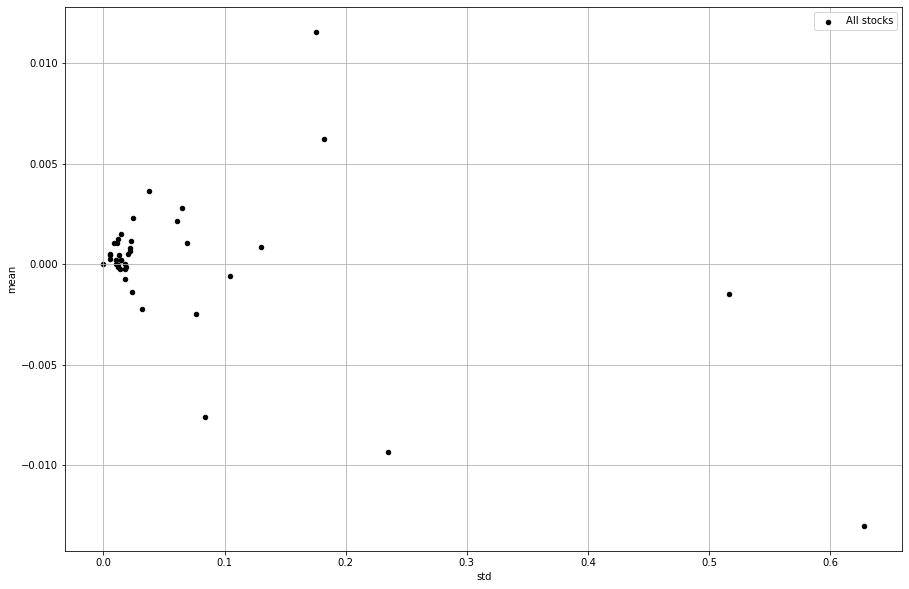

In [30]:
ratings.plot(x='std', y='mean', kind="scatter", label='All stoсks', figsize=(15,10), grid='On', color='black')
plt.legend()
plt.show()

Из графика можно увидеть множество активов, по которым мы сделали следующие выводы:

1. В основном активы находятся в зоне малого риска и небольшой доходности
2. Существует несколько активов с большим риском и большой доходностью
3. Существует несколько активов с большим риском и отрицательной доходностью
4. Существует несколько активов с небольшим риском и с почти нулевой доходностью
5. Так же существует актив с 0 риском и 0 доходностью, который мы не будем учитывать в дальнейшем анализе

## Задание 3
## Рассмотрите портфель с равными долями капитала и отметьте его на карте активов в системе координат (σ, E). Дайте характеристику этому портфелю.

In [31]:
portfolio_mean = 0
portfolio_std = 0
n = len(tickers)

e_sum = 0
for i in range(n-1):
     e_sum += ratings['mean'][tickers[i]]
portfolio_mean = e_sum/n

s_sum = 0
for i in range(1, n-1):
    for j in range(i, n):
        s_sum += (np.cov(log_returns[tickers[i]].astype(float), log_returns[tickers[j]].astype(float))[0][1])/n**2
portfolio_std = math.sqrt(s_sum)

print(f'Доходность портфеля с равными долями: {portfolio_mean}')
print(f'Риск портфеля с равными долями: {portfolio_std}')

Доходность портфеля с равными долями: 2.6626644009574614e-05
Риск портфеля с равными долями: 0.022756136232751592


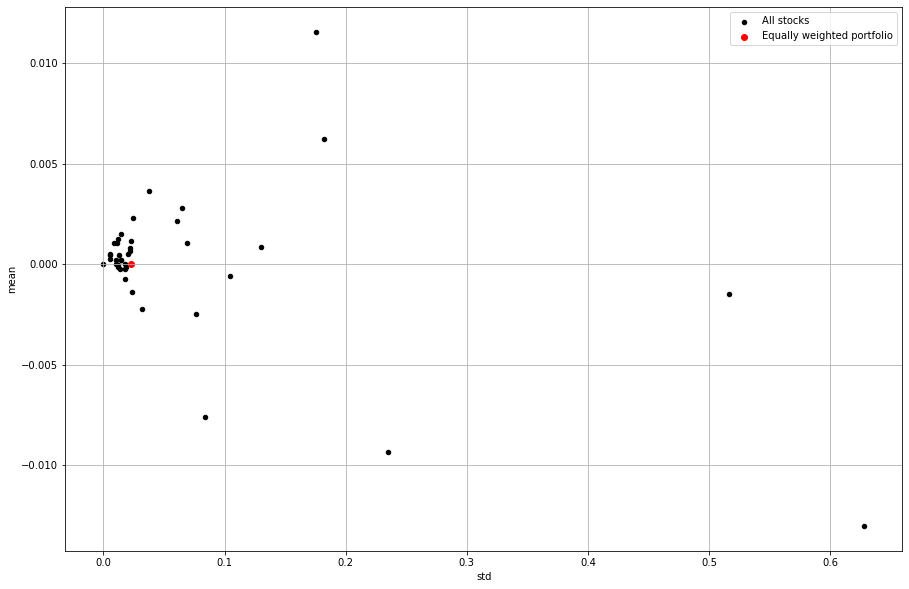

In [32]:
ratings.plot(x='std', y='mean', kind="scatter", label='All stoсks', figsize=(15,10), grid='On', color='black')
plt.scatter(portfolio_std, portfolio_mean, color="red", label='Equally weighted portfolio')
plt.legend()
plt.show()

Портфель с равными долями имеет очень малую доходность, но при этом больший риск, чем у основного скопления активов.

## Задание 4
## Рассмотрите индекс рынка и отметьте его на карте активов в системе координат (σ,E). Дайте характеристику индексу рынка.

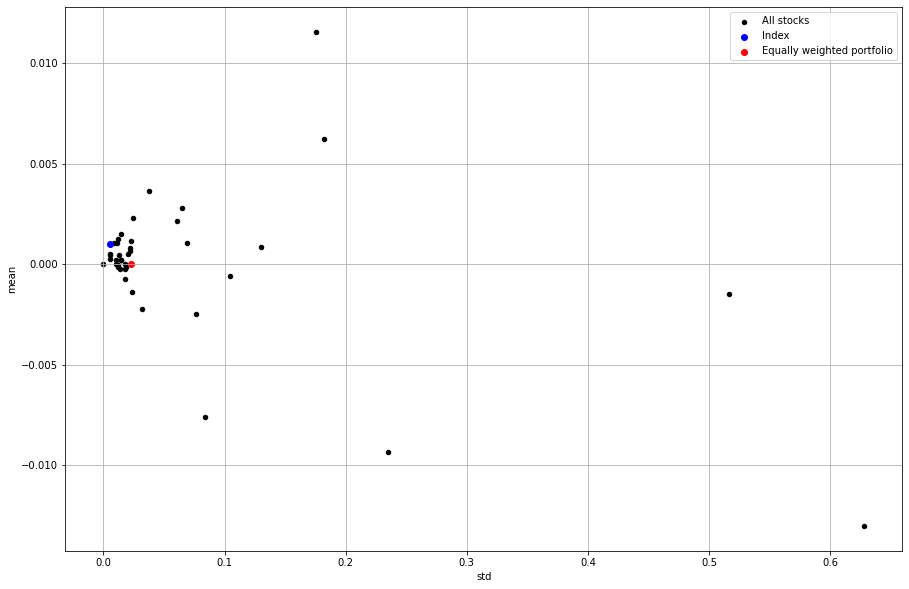

In [33]:
ratings.plot(x='std', y='mean', kind="scatter", label='All stoсks', figsize=(15,10), grid='On', color='black')
plt.scatter(index_std, index_mean, color="blue", label='Index')
plt.scatter(portfolio_std, portfolio_mean, color="red", label='Equally weighted portfolio')
plt.legend()
plt.show()

Индекс рынка, по сравнению с портфелем, имеет меньший риск, но большую доходность

## Задание 5
## Задайте уровень риска и оцените VaR (Value at Risk = Сумма под Риском для случайных величин Потери = - Доходности) для активов вашего рынка. Какой из активов наиболее предпочтителен по этой характеристике? Где он расположен на карте активов? Дайте характеристику VaR портфеля с равными долями и индекса рынка.

In [93]:
losses = -log_returns.drop(['Date'], axis=1)
eqw_portfolio_losses = [-i for i in ratings['mean']]

In [94]:
VaR_90 = np.quantile(losses, q=0.9, axis=0)
VaR_90 = pd.DataFrame(columns = tickers, data=[VaR_90])
del VaR_90['NSEI']
VaR_90

,ABB,ABML,ABMT,ACCO,ADIA,AFFL,AGRO,ALMC,AMBK,AMJL,...,CORI,CRDE,CROP,CTBK,CUBE,DENN,DIVI,DLMI,ELST,EMBA
0,0.009333,0.087289,0.0,0.022615,0.0,0.0,0.022558,0.0,0.003973,0.025263,...,0.036303,0.0,0.006555,0.223143,0.013334,0.014827,0.005547,0.0,0.023611,0.006612


In [95]:
VaR_95 = np.quantile(losses, q=0.95, axis=0)
VaR_95 = pd.DataFrame(columns = tickers, data=[VaR_95])
del VaR_95['NSEI']
VaR_95

,ABB,ABML,ABMT,ACCO,ADIA,AFFL,AGRO,ALMC,AMBK,AMJL,...,CORI,CRDE,CROP,CTBK,CUBE,DENN,DIVI,DLMI,ELST,EMBA
0,0.01269,0.122362,-0.0,0.02786,-0.0,-0.0,0.028825,0.002264,0.018346,0.045115,...,0.0459,-0.0,0.008395,1.024196,0.023072,0.017569,0.008054,-0.0,0.077651,0.154151


In [96]:
best_stock_90 = VaR_90.loc[0].idxmin()
best_stock_90_score = VaR_90.loc[0].min()

best_stock_95 = VaR_95.loc[0].idxmin()
best_stock_95_score = VaR_95.loc[0].min()



In [97]:
print(best_stock_90, best_stock_90_score)
print(best_stock_95, best_stock_95_score)


ABMT 0.0
ABMT -0.0


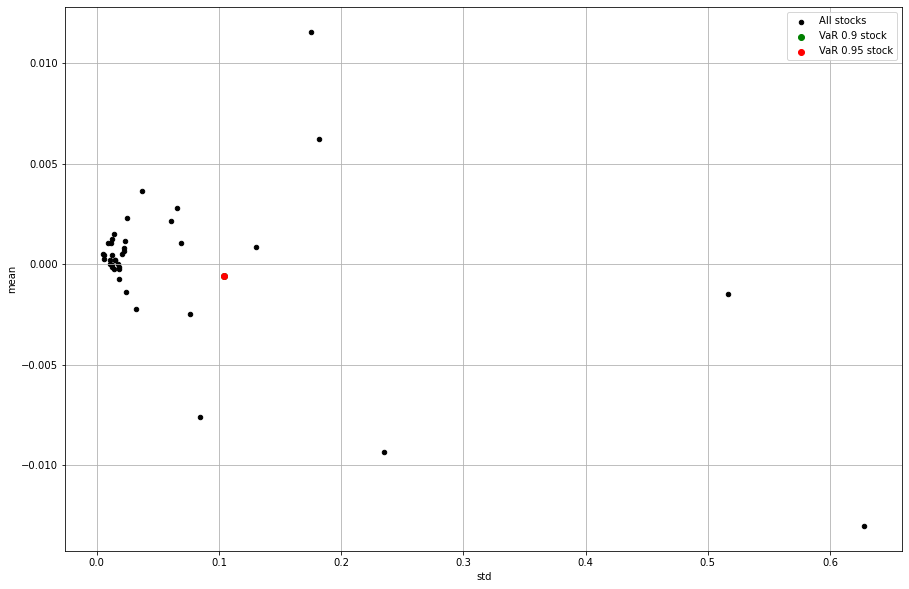

In [98]:
ratings.plot(x='std', y='mean', kind="scatter", label='All stoсks', figsize=(15,10), grid='On', color='black')
plt.scatter(ratings['std'][best_stock_90], ratings['mean'][best_stock_90], color="green", label='VaR 0.9 stock')
plt.scatter(ratings['std'][best_stock_95], ratings['mean'][best_stock_95], color="red", label='VaR 0.95 stock')
plt.legend()
plt.show()


In [99]:
VaR_eqw_90 = np.quantile(eqw_portfolio_losses, q=0.90)
VaR_eqw_95 = np.quantile(eqw_portfolio_losses, q=0.95)


print('VaR для портфеля с равными долями капитала:')
print(f'0.9:  {VaR_eqw_90}')
print(f'0.95: {VaR_eqw_95}')


VaR для портфеля с равными долями капитала:
0.9:  0.002276128531259484
0.95: 0.007771190508865371


In [100]:
VaR_idx_90 = np.quantile(losses['NSEI'], q=0.90)
VaR_idx_95 = np.quantile(losses['NSEI'], q=0.95)


print('VaR для портфеля с равными долями капитала:')
print(f'0.9:  {VaR_idx_90}')
print(f'0.95: {VaR_idx_95}')


VaR для портфеля с равными долями капитала:
0.9:  0.006756680894225635
0.95: 0.008967199305110321


## Задание 6
## Выберите несколько интересных (значимых) активов рынка. Можно ли считать наблюдаемые доходности (объемы продаж) конкретного актива повторной выборкой из некоторого распределения (белый шум)? Поищите научные подходы к ответу на этот вопрос (проверка гипотезы о случайности, Ивченко Г.И. Медведев Ю.И. Введение в математическую статистику)

Активы, которые мы будем рассматривать: ANIK, ALMC, ARCO, AFFL, APTS

In [42]:
def inversion(name, log_returns):
  alpha = 0.05
  n = log_returns.shape[0]    
  inv_count = 0
  for i in range(1, n):
      for j in range(i+1, n+1): 
          if log_returns[i] > log_returns[j]:
              inv_count += 1
  
  mu = (n*(n - 1))/4
  s2 = (2*n**2 + 3*n**2 - 5*n)/72
  
  inv_norm_distr = abs((n - mu)/math.sqrt(s2))
  
  if inv_norm_distr < scipy.stats.norm.ppf(1 - (alpha/2)):
      print(f"Критерий инверсии: гипотеза подтверджается")
  else:
      print(f"Критерий инверсии: гипотеза отвергается")

In [43]:
def autocorrelation(name, log_returns):
  alpha = 0.05
  n = log_returns.shape[0]
  
  sum_xi_xi1 = 0 # sum of x_i*x_{i+1}
  sum_xi = 0 # sum of x_i
  sum_xi_sq = 0 # sum of x_{i}^{2}
  for i in range(1, n):
      sum_xi_xi1 += log_returns[i]*log_returns[i+1] 
  for i in range(1, n+1):
      sum_xi += log_returns[i]
      sum_xi_sq += log_returns[i]**2
          
  A = ((n*sum_xi_xi1 - sum_xi**2 + n*log_returns[1]*log_returns[n]) / (n*sum_xi_sq - sum_xi**2))
  
  e = -(1/(n - 1)) # expected_value
  s = ((n*(n-3))/((n+1)*(n-1)**2)) # variance
  A_ = (A - e)/(math.sqrt(s)) # A*
  
  if A_ < scipy.stats.norm.ppf(1 - (alpha/2)):
      print(f"Критерий автокорреляции: гипотеза подтверджается")
  else:
      print(f"Критерий автокорреляции: гипотеза отвергается")

In [44]:
tickers_list = ['ANIK', 'ALMC', 'ARCO', 'AFFL', 'APTS']
for ticker in tickers_list:
  print(ticker)
  inversion(ticker, log_returns[ticker])
  autocorrelation(ticker, log_returns[ticker])
  print()

ANIK
Критерий инверсии: гипотеза отвергается
Критерий автокорреляции: гипотеза подтверджается

ALMC
Критерий инверсии: гипотеза отвергается
Критерий автокорреляции: гипотеза подтверджается

ARCO
Критерий инверсии: гипотеза отвергается
Критерий автокорреляции: гипотеза подтверджается

AFFL
Критерий инверсии: гипотеза отвергается
Критерий автокорреляции: гипотеза подтверджается

APTS
Критерий инверсии: гипотеза отвергается
Критерий автокорреляции: гипотеза подтверджается



## Задание 7
### Выберите несколько интересных (значимых)  активов рынка из разных  производственных секторов.   В предположении, что наблюдаемые доходности  (объемы продаж) являются повторной выборкой из некоторого распределения  исследовать (выборочно) распределения доходностей и объемов продаж выбранных  активов.

In [50]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [53]:
import seaborn as sns

Активы, которые мы будем рассматривать: ADIA, ABB, ANGO, ARCO

D:\programm\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


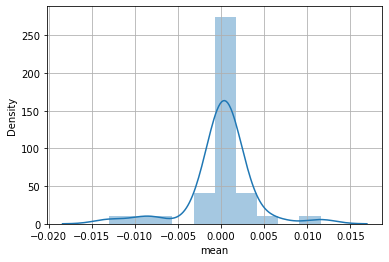

D:\programm\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


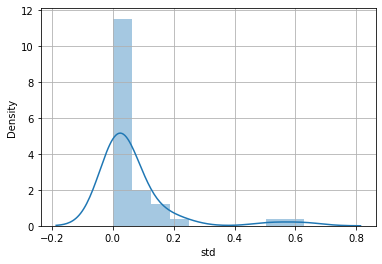

In [54]:
stocks_by_industry = ['ADIA', 'ABB', 'ANGO', 'ARCO']

def plot_vs_pdf(columns):
    for column in columns:
        plt.grid()
        sns.distplot(ratings[column], bins=10)
        plt.show()
plot_vs_pdf(ratings)

In [69]:
from scipy.stats import shapiro, normaltest, anderson
tests = {"Shapiro-test" : shapiro, 
         "normal-test" : normaltest, 
         "Anderson-test" : anderson, }
def test_gipothesys(column, alfa=0.05, log_returns = log_returns):
    for test_name, test_f in tests.items():
        result = test_f(log_returns[column])
        if test_name == 'Anderson-test':
            statistic = result[0]
            answer = 'отклоняется' if statistic > result[1][2] else 'не отвергается'
            print("\t Гипотеза {} {}, статистика={:3f}".format(answer, test_name, statistic))
        else:
            p_value = result[1]
            answer = 'не отвергается' if p_value > alfa else 'отклоняется'
            print("\t Гипотеза {} {}, p-value={:3f}".format(answer, test_name,  p_value))

In [79]:
cases = ['profit', 'volume']
for case in cases:
    print(f'Tecты на нормальное распределение по {case} для выбранных акций из разных производственных секторов')
    for column in stocks_by_industry:
        print("Для {}:".format(column, log_returns))
        if case == 'volume':
            test_gipothesys(column, log_returns = volume)
        else:
            test_gipothesys(column)

Tecты на нормальное распределение по profit для выбранных акций из разных производственных секторов
Для ADIA:
	 Гипотеза отклоняется Shapiro-test, p-value=0.000000
	 Гипотеза отклоняется normal-test, p-value=0.000000
	 Гипотеза отклоняется Anderson-test, статистика=83.950697
Для ABB:
	 Гипотеза отклоняется Shapiro-test, p-value=0.000027
	 Гипотеза отклоняется normal-test, p-value=0.000416
	 Гипотеза отклоняется Anderson-test, статистика=2.166013
Для ANGO:
	 Гипотеза отклоняется Shapiro-test, p-value=0.000000
	 Гипотеза отклоняется normal-test, p-value=0.000000
	 Гипотеза отклоняется Anderson-test, статистика=5.448775
Для ARCO:
	 Гипотеза отклоняется Shapiro-test, p-value=0.000000
	 Гипотеза отклоняется normal-test, p-value=0.000000
	 Гипотеза отклоняется Anderson-test, статистика=3.858150
Tecты на нормальное распределение по volume для выбранных акций из разных производственных секторов
Для ADIA:
	 Гипотеза отклоняется Shapiro-test, p-value=0.000000
	 Гипотеза отклоняется normal-test, 

## Задание 8
### Исследовать зависимости (выборочно) между доходностями различных активов с  помощью техники анализа зависимостей. Сделайте анализ зависимостей между парами активов для активов из одного производственного сектора и для активов из разных производственных секторов. Сделайте анализ зависимости (выборочно) между доходностями и объемами продаж одного актива. Рассмотрите активы из разных производственных секторов. 

### Проверка на однородность распределений

In [84]:
from scipy import stats

In [87]:
sectors = {'industry': ["ABMT", "ACCO"], 'finance':["APTS", "ABML"]}
stocks_by_industry = ['ADIA', 'ABB', 'ANGO', 'ARCO']
def ttest_pair_in_sector(sector_name, alpha=0.05):
    print(sector_name + ' Pair:')
    for i in sectors[sector_name]:
        for j in sectors[sector_name]:
            if i == j:
                continue
            print(f"\n{i} : {j}")
            stat_returns, p_returns = stats.ttest_ind(log_returns[i], log_returns[j], equal_var=False)

            stat_volume, p_volume = stats.ttest_ind(volume[i], volume[j], equal_var=False)

            print('\tStatistics = %.3f, p-value = %.3f' % (stat_returns, p_returns))
            if p_returns > alpha:
                print('\tПринять гипотезу об однородности распределения доходности')
            else:
                print('\tОтклонить гипотезу об однородности распределения доходности')

            print('\n\tStatistics = %.3f, p-value = %.3f' % (stat_volume, p_volume))

            if p_volume > alpha:
                log_returns(i)
                print('\tПринять гипотезу об однородности распределения объемов продаж')
            else:
                print('\tОтклонить гипотезу об однородности распределения объемов продаж')
    print()
    for col in sectors[sector_name]:
        print(f'One stock: {col}')

        stat_returns, p_returns = stats.ttest_ind(log_returns[col], volume[col], equal_var=False)

        print('\tStatistics = %.3f, p-value = %.3f' % (stat_returns, p_returns))
        if p_returns > alpha:
            print('\tПринять гипотезу об однородности распределения доходности и объема продаж')
        else:
            print('\tОтклонить гипотезу об однородности распределения доходности и объема продаж')
    print()
    
        

In [88]:
for sector_name in sectors.keys():
     ttest_pair_in_sector(sector_name)

industry Pair:

ABMT : ACCO
	Statistics = -0.065, p-value = 0.948
	Принять гипотезу об однородности распределения доходности

	Statistics = -36.164, p-value = 0.000
	Отклонить гипотезу об однородности распределения объемов продаж

ACCO : ABMT
	Statistics = 0.065, p-value = 0.948
	Принять гипотезу об однородности распределения доходности

	Statistics = 36.164, p-value = 0.000
	Отклонить гипотезу об однородности распределения объемов продаж

One stock: ABMT
	Statistics = -3.368, p-value = 0.001
	Отклонить гипотезу об однородности распределения доходности и объема продаж
One stock: ACCO
	Statistics = -36.182, p-value = 0.000
	Отклонить гипотезу об однородности распределения доходности и объема продаж

finance Pair:

APTS : ABML
	Statistics = 0.804, p-value = 0.422
	Принять гипотезу об однородности распределения доходности

	Statistics = 10.922, p-value = 0.000
	Отклонить гипотезу об однородности распределения объемов продаж

ABML : APTS
	Statistics = -0.804, p-value = 0.422
	Принять гипот

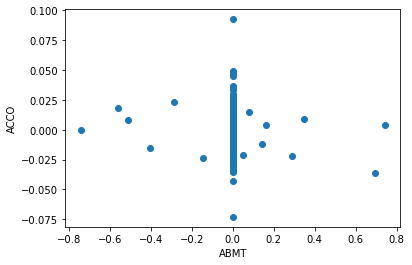

Коэффициент корреляции:  -0.07945714742000895


In [89]:
plt.scatter(log_returns['ABMT'], log_returns['ACCO'])
plt.xlabel('ABMT')
plt.ylabel('ACCO')
plt.show()

print('Коэффициент корреляции: ' , np.corrcoef(log_returns['ABMT'].astype(float), log_returns['ACCO'].astype(float))[1][0])

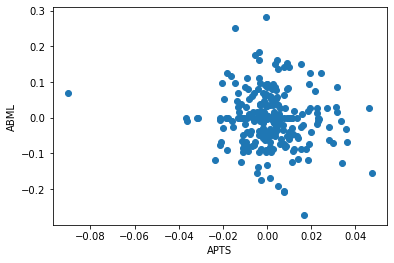

Коэффициент корреляции:  -0.1023018582652399


In [90]:
plt.scatter(log_returns['APTS'], log_returns['ABML'])
plt.xlabel('APTS')
plt.ylabel('ABML')
plt.show()

print('Коэффициент корреляции: ' , np.corrcoef(log_returns['APTS'].astype(float), log_returns['ABML'].astype(float))[1][0])